In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df['DEATH_EVENT'].unique()

array([1, 0])

<Axes: xlabel='DEATH_EVENT'>

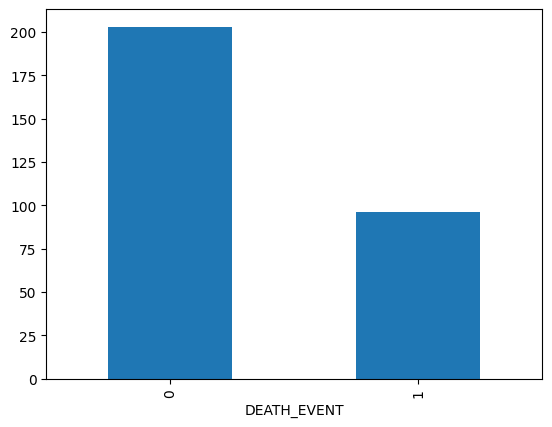

In [7]:
df['DEATH_EVENT'].value_counts().plot.bar()

In [8]:
df.isna().any().any()


np.False_

In [9]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [10]:
len(X)

299

In [11]:
X.shape

(299, 12)

In [12]:

X = np.abs(X)


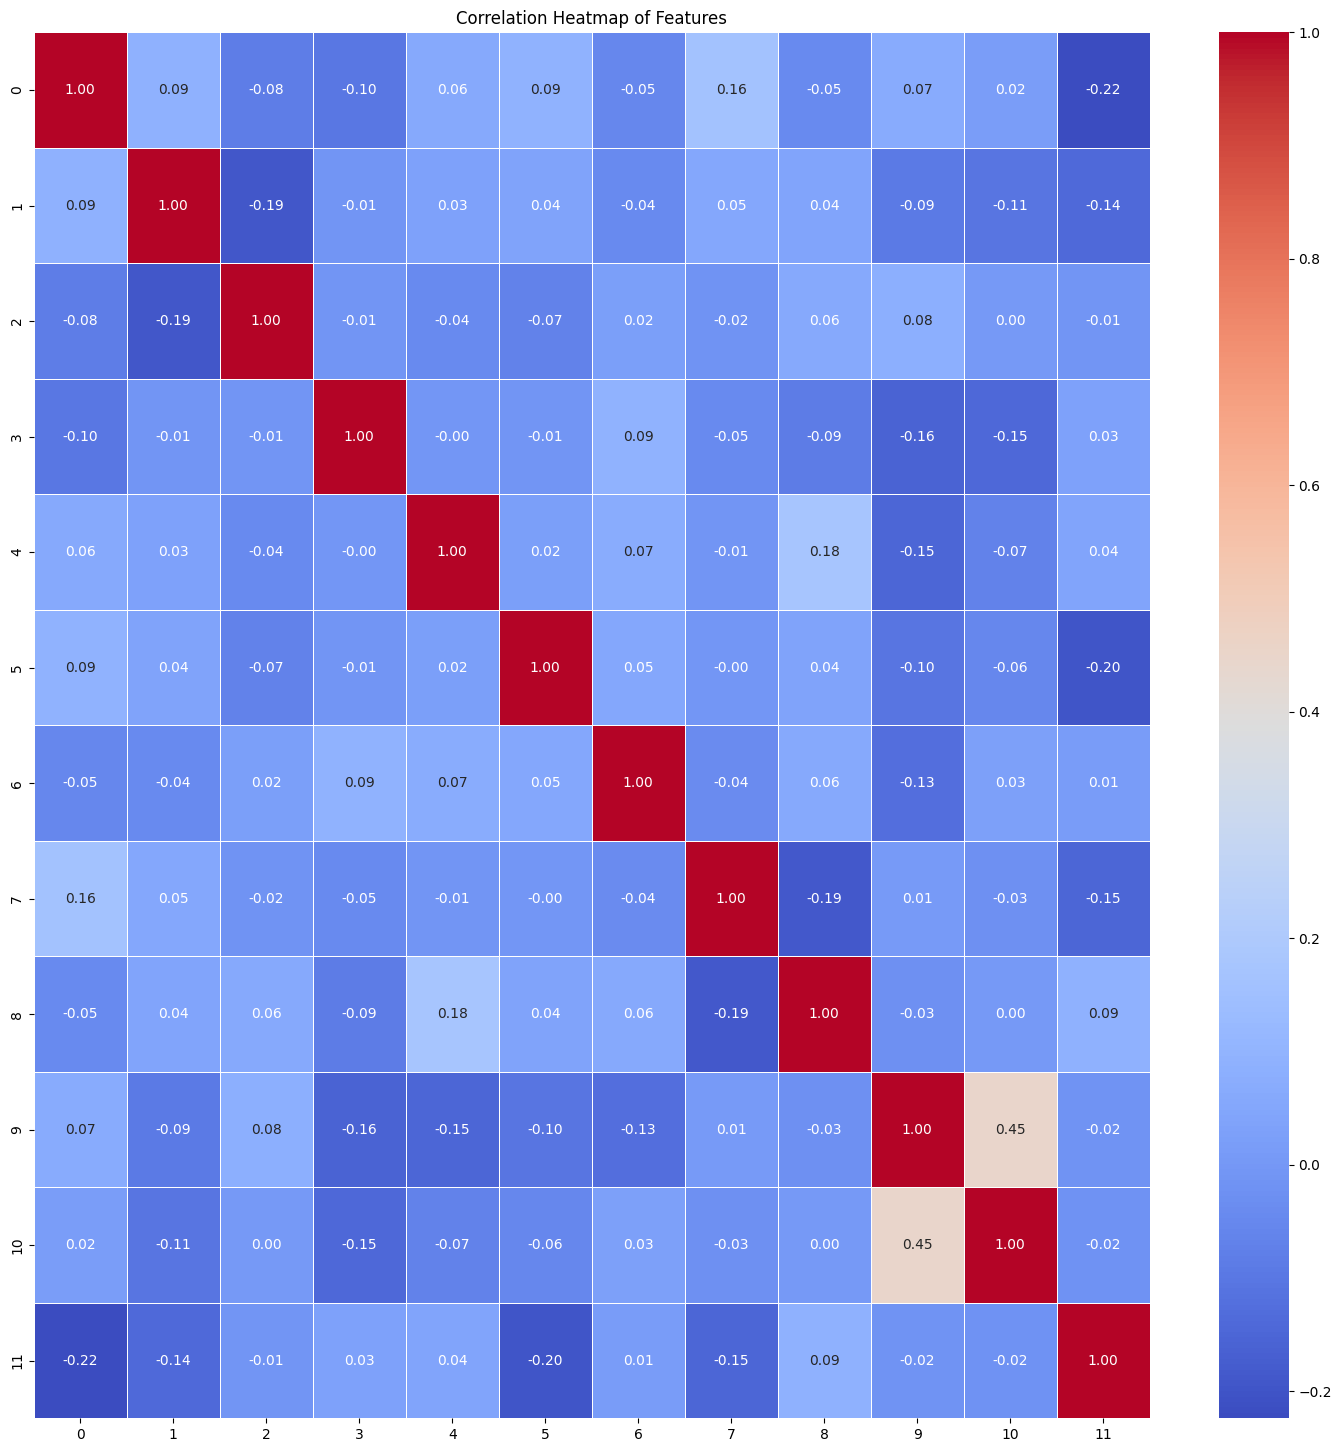

In [13]:
X_df = pd.DataFrame(X)


corr_matrix = X_df.corr()

# Plot heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [14]:
FeatureSelection = SelectPercentile(score_func = chi2, percentile=70)
FeatureSelection = FeatureSelection.fit(X, Y)
X= FeatureSelection.transform(X)


In [15]:
print('Selected Features are : ' , FeatureSelection.get_support())

Selected Features are :  [ True False  True False  True  True  True  True  True False False  True]


In [16]:
scaler = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
X = scaler.fit_transform(X)

In [17]:

scaler = StandardScaler(copy=True, with_mean=True)
X = scaler.fit_transform(X)

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle =True)


In [19]:
LogisticRegressionModel = LogisticRegression(penalty='l2', solver='lbfgs', C=0.01)
LogisticRegressionModel.fit(X_train, y_train)


print(LogisticRegressionModel.score(X_train, y_train))
print(LogisticRegressionModel.score(X_test, y_test))

0.845
0.8282828282828283


In [20]:
y_pred = LogisticRegressionModel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

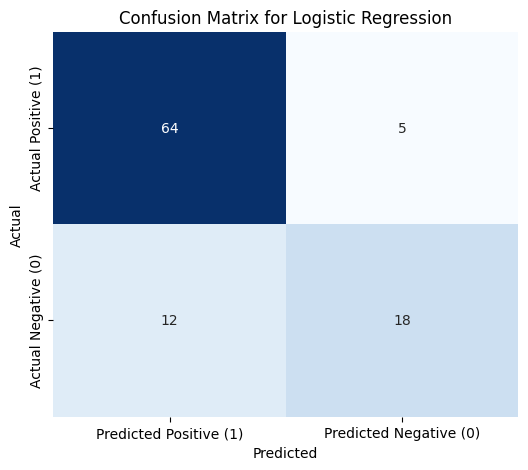

In [21]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, 
            xticklabels=['Predicted Positive (1)', 'Predicted Negative (0)'], 
            yticklabels=['Actual Positive (1)', 'Actual Negative (0)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [22]:
SVCModel = SVC(kernel= 'rbf',
               max_iter=10000,C=0.5,gamma='auto')
SVCModel.fit(X_train, y_train)

print(SVCModel.score(X_train, y_train))
print(SVCModel.score(X_test, y_test))


0.885
0.8080808080808081


In [23]:
y_pred = SVCModel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

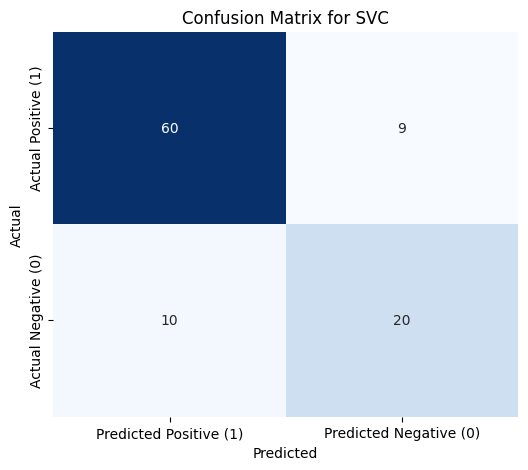

In [24]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, 
            xticklabels=['Predicted Positive (1)', 'Predicted Negative (0)'], 
            yticklabels=['Actual Positive (1)', 'Actual Negative (0)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC')
plt.show()


In [25]:
import pickle


# Export scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Export model
with open('SVCModel.pkl', 'wb') as model_file:
    pickle.dump(SVCModel, model_file)
